# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [1]:
# importa as bibliotecas utilizadas

import pandas as pd
import seaborn as sns

In [2]:
# 1) seu código aqui

df = pd.read_csv('SINASC_RO_2019.csv', na_values=['na','NaN'])
print(df.shape)
df.drop_duplicates().shape

(27028, 69)


(27028, 69)

In [3]:
# exibe o arquivo .csv carregado

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
# 2)

# define uma função que calcula a porcentagem dos dados faltantes e retorna em um dicionario
def dados_faltantes(df: pd.DataFrame) -> list:
    
  dados_faltantes = []
  for col in df.columns:

       if df[col].isna().any():
              qtd, _ = df[df[col].isna()].shape
              total, _ = df.shape
              dict_dados_faltantes = {col:
                {
                    'quantidade': qtd,
                    "porcentagem": round(100 * qtd/total, 2)
                }
              }
              dados_faltantes.append(dict_dados_faltantes)
 
  return dados_faltantes

In [5]:
dados_faltantes(df)

[{'CODESTAB': {'quantidade': 115, 'porcentagem': 0.43}},
 {'ESTCIVMAE': {'quantidade': 317, 'porcentagem': 1.17}},
 {'ESCMAE': {'quantidade': 312, 'porcentagem': 1.15}},
 {'CODOCUPMAE': {'quantidade': 2907, 'porcentagem': 10.76}},
 {'QTDFILVIVO': {'quantidade': 1573, 'porcentagem': 5.82}},
 {'QTDFILMORT': {'quantidade': 2098, 'porcentagem': 7.76}},
 {'GESTACAO': {'quantidade': 1232, 'porcentagem': 4.56}},
 {'GRAVIDEZ': {'quantidade': 79, 'porcentagem': 0.29}},
 {'PARTO': {'quantidade': 49, 'porcentagem': 0.18}},
 {'HORANASC': {'quantidade': 21, 'porcentagem': 0.08}},
 {'SEXO': {'quantidade': 4, 'porcentagem': 0.01}},
 {'APGAR1': {'quantidade': 96, 'porcentagem': 0.36}},
 {'APGAR5': {'quantidade': 103, 'porcentagem': 0.38}},
 {'RACACOR': {'quantidade': 647, 'porcentagem': 2.39}},
 {'IDANOMAL': {'quantidade': 591, 'porcentagem': 2.19}},
 {'CODANOMAL': {'quantidade': 26814, 'porcentagem': 99.21}},
 {'DTRECORIGA': {'quantidade': 27028, 'porcentagem': 100.0}},
 {'NATURALMAE': {'quantidade':

In [6]:
# 3) seu código aqui

# imprime um dicionário com os dados faltantes das categorias relevantes para o problema
col_relevantes = ['LOCNASC','IDADEMAE','ESTCIVMAE','ESCMAE','QTDFILVIVO','GESTACAO','GRAVIDEZ','CONSULTAS','APGAR5']

# cria um dataframe com as colunas relevantes para a análise
df1 = df[col_relevantes]

dados_faltantes(df=df1)

[{'ESTCIVMAE': {'quantidade': 317, 'porcentagem': 1.17}},
 {'ESCMAE': {'quantidade': 312, 'porcentagem': 1.15}},
 {'QTDFILVIVO': {'quantidade': 1573, 'porcentagem': 5.82}},
 {'GESTACAO': {'quantidade': 1232, 'porcentagem': 4.56}},
 {'GRAVIDEZ': {'quantidade': 79, 'porcentagem': 0.29}},
 {'APGAR5': {'quantidade': 103, 'porcentagem': 0.38}}]

In [7]:
df1.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0


### Apgar5 será a nossa variável de interesse principal.

In [8]:
# 4) seu código aqui

# exclui as linhas que possuem APGAR5 como dado faltante.
df2 = df1.dropna(subset=['APGAR5'])
print(df2.shape)

(26925, 9)


In [9]:
# Imprime a porcentagem de dados restantes após a limpeza dos dados.

print(round((df2.shape[0]/df1.shape[0])*100,2))

99.62


#### A base de dados continua consistente com 99.62% dos dados.

In [10]:
# 5) seu código aqui

print('ESTCIVMAE:\n')
print(df2['ESTCIVMAE'].value_counts())

print('\nCONSULTAS:\n')
print(df2['CONSULTAS'].value_counts())

ESTCIVMAE:

2.0    9906
1.0    8907
5.0    7145
4.0     451
9.0     144
3.0      57
Name: ESTCIVMAE, dtype: int64

CONSULTAS:

4    18587
3     5957
2     1359
1      972
9       50
Name: CONSULTAS, dtype: int64


In [11]:
estcivmae_faltantes = df2[df2['ESTCIVMAE'] == 9.0].index
consultas_faltantes = df2[df2['CONSULTAS'] == 9].index

df3 = df2.drop(estcivmae_faltantes)
df4 = df3.drop(consultas_faltantes)

In [12]:
print(df3.shape)
print(df4.shape)

(26781, 9)
(26731, 9)


In [13]:
# confere se houve a exclusão dos valores '9'

print('ESTCIVMAE:\n')
print(df4['ESTCIVMAE'].value_counts())

print('\nCONULTAS:\n')
print(df4['CONSULTAS'].value_counts())

ESTCIVMAE:

2.0    9893
1.0    8881
5.0    7135
4.0     450
3.0      57
Name: ESTCIVMAE, dtype: int64

CONULTAS:

4    18486
3     5925
2     1354
1      966
Name: CONSULTAS, dtype: int64


In [14]:
# 6) Seu código aqui

# exibe dataframe que será usado daqui pra frente (contém apenas as 9 colunas relevantes)

df4.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0


In [15]:
# exibe o tipo de variavel de 'QTDFILVIVO'
print(df4['QTDFILVIVO'].dtype)

float64


In [16]:
# checa se existe dados faltantes em 'QTDFILVIVO'
df4['QTDFILVIVO'].isna().any()

True

In [17]:
df4[df4['QTDFILVIVO'].isna()]

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
119,1,28,1.0,8 a 11 anos,NaN,37 a 41 semanas,Única,3,9.0
877,1,29,5.0,4 a 7 anos,NaN,37 a 41 semanas,Única,4,10.0
2322,1,28,2.0,8 a 11 anos,NaN,42 semanas e mais,Única,4,10.0
2332,1,16,1.0,4 a 7 anos,NaN,37 a 41 semanas,Única,4,10.0
3631,1,36,2.0,12 anos ou mais,NaN,32 a 36 semanas,Única,4,9.0
...,...,...,...,...,...,...,...,...,...
26963,1,26,2.0,8 a 11 anos,NaN,37 a 41 semanas,Única,4,9.0
26965,1,20,2.0,8 a 11 anos,NaN,37 a 41 semanas,Única,4,9.0
26969,1,22,5.0,8 a 11 anos,NaN,32 a 36 semanas,Única,3,9.0
26972,1,18,1.0,8 a 11 anos,NaN,37 a 41 semanas,Única,3,10.0


In [18]:
df4['QTDFILVIVO'].value_counts()

1.0     9305
0.0     9231
2.0     4419
3.0     1348
4.0      475
5.0      212
6.0      104
7.0       40
8.0       23
9.0        8
10.0       6
12.0       3
11.0       1
30.0       1
14.0       1
Name: QTDFILVIVO, dtype: int64

In [19]:
df4[df4['QTDFILVIVO'].isna()]

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
119,1,28,1.0,8 a 11 anos,NaN,37 a 41 semanas,Única,3,9.0
877,1,29,5.0,4 a 7 anos,NaN,37 a 41 semanas,Única,4,10.0
2322,1,28,2.0,8 a 11 anos,NaN,42 semanas e mais,Única,4,10.0
2332,1,16,1.0,4 a 7 anos,NaN,37 a 41 semanas,Única,4,10.0
3631,1,36,2.0,12 anos ou mais,NaN,32 a 36 semanas,Única,4,9.0
...,...,...,...,...,...,...,...,...,...
26963,1,26,2.0,8 a 11 anos,NaN,37 a 41 semanas,Única,4,9.0
26965,1,20,2.0,8 a 11 anos,NaN,37 a 41 semanas,Única,4,9.0
26969,1,22,5.0,8 a 11 anos,NaN,32 a 36 semanas,Única,3,9.0
26972,1,18,1.0,8 a 11 anos,NaN,37 a 41 semanas,Única,3,10.0


In [20]:
# cria uma cópia do df atual

df5 = df4.copy()

In [21]:
# substituindo os valores faltantes por zero

df5['QTDFILVIVO'] = df5['QTDFILVIVO'].fillna(0)

In [22]:
# checa se a substituição foi bem sucedida

print(df5['QTDFILVIVO'].isna().any())
print(df5['QTDFILVIVO'].value_counts())

False
0.0     10785
1.0      9305
2.0      4419
3.0      1348
4.0       475
5.0       212
6.0       104
7.0        40
8.0        23
9.0         8
10.0        6
12.0        3
11.0        1
30.0        1
14.0        1
Name: QTDFILVIVO, dtype: int64


In [23]:
# 7) seu código aqui


In [24]:
# calcular a porcentagem do aumento de mulheres com 0.0 filhos

filhos_antes_subs = df4[df4['QTDFILVIVO']==0.0].shape[0]
filhos_apos_subs = df5[df5['QTDFILVIVO']==0.0].shape[0]

print(f'Aumento nominal de {filhos_apos_subs - filhos_antes_subs} mulheres com 0.0 filhos.')

Aumento nominal de 1554 mulheres com 0.0 filhos.


In [25]:
# calcula o aumento em porcentagem

print(round(filhos_apos_subs/df5.shape[0]*100 - filhos_antes_subs/df4.shape[0]*100,2))

5.81


Sendo o aumento de 5.81%, que é alto, é prudente excluir a base de dados faltantes. Passo feito a seguir.

In [26]:
df6 = df4.dropna(subset='QTDFILVIVO')

print(f'Novo shape dos dataset: {df6.shape}')
print(f'Em relação ao dataset original, {round(100 - (df6.shape[0]/df.shape[0]*100),2)}% de linhas foram excluidas.')

Novo shape dos dataset: (25177, 9)
Em relação ao dataset original, 6.85% de linhas foram excluidas.


In [27]:
# 8) seu código aqui

# distribuição de valores para APGAR5

df6['APGAR5'].value_counts()

9.0     15150
10.0     7726
8.0      1862
7.0       231
6.0        76
5.0        43
1.0        22
4.0        20
2.0        18
0.0        15
3.0        14
Name: APGAR5, dtype: int64

In [28]:
# função que categoriza o grau de asfixia com base na coluna APGAR5

def classificao_apgar5(index) -> str:
    
    if index <= 3:
        return 'Asfixia severa'

    if index >= 4 and index <= 5:
        return 'Asfixia moderada'

    if index >= 6 and index <= 7:
        return 'Asfixia leve'

    if index >= 8 and index <= 10:
        return 'Normal'

In [29]:
# cria a coluna Classif APGAR5

df6['Classif_APGAR5'] = df6['APGAR5'].map(classificao_apgar5)

/tmp/ipykernel_102367/2037653838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Classif_APGAR5'] = df6['APGAR5'].map(classificao_apgar5)


In [30]:
# frequência da classificação

df6['Classif_APGAR5'].value_counts()

Normal              24738
Asfixia leve          307
Asfixia severa         69
Asfixia moderada       63
Name: Classif_APGAR5, dtype: int64

<AxesSubplot:xlabel='Classif_APGAR5', ylabel='Frequency'>

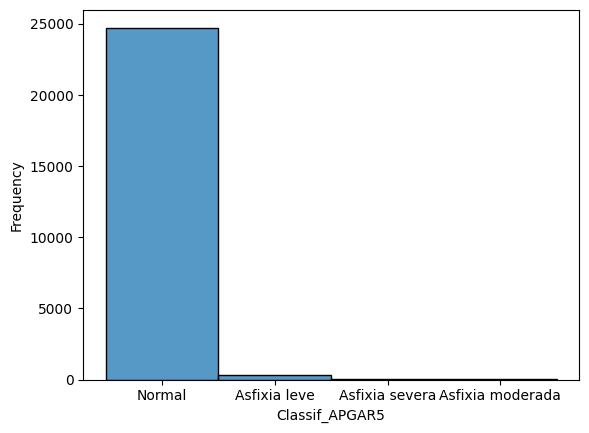

In [32]:
# histrograma

sns.histplot(data=df6['Classif_APGAR5'], stat='frequency')

In [33]:
# 9) seu código aqui

df6.rename(str.lower, axis=1)


,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,classif_apgar5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal
...,...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,Normal
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,Normal
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,Normal
